AttributeError: 'numpy.ndarray' object has no attribute 'figure'

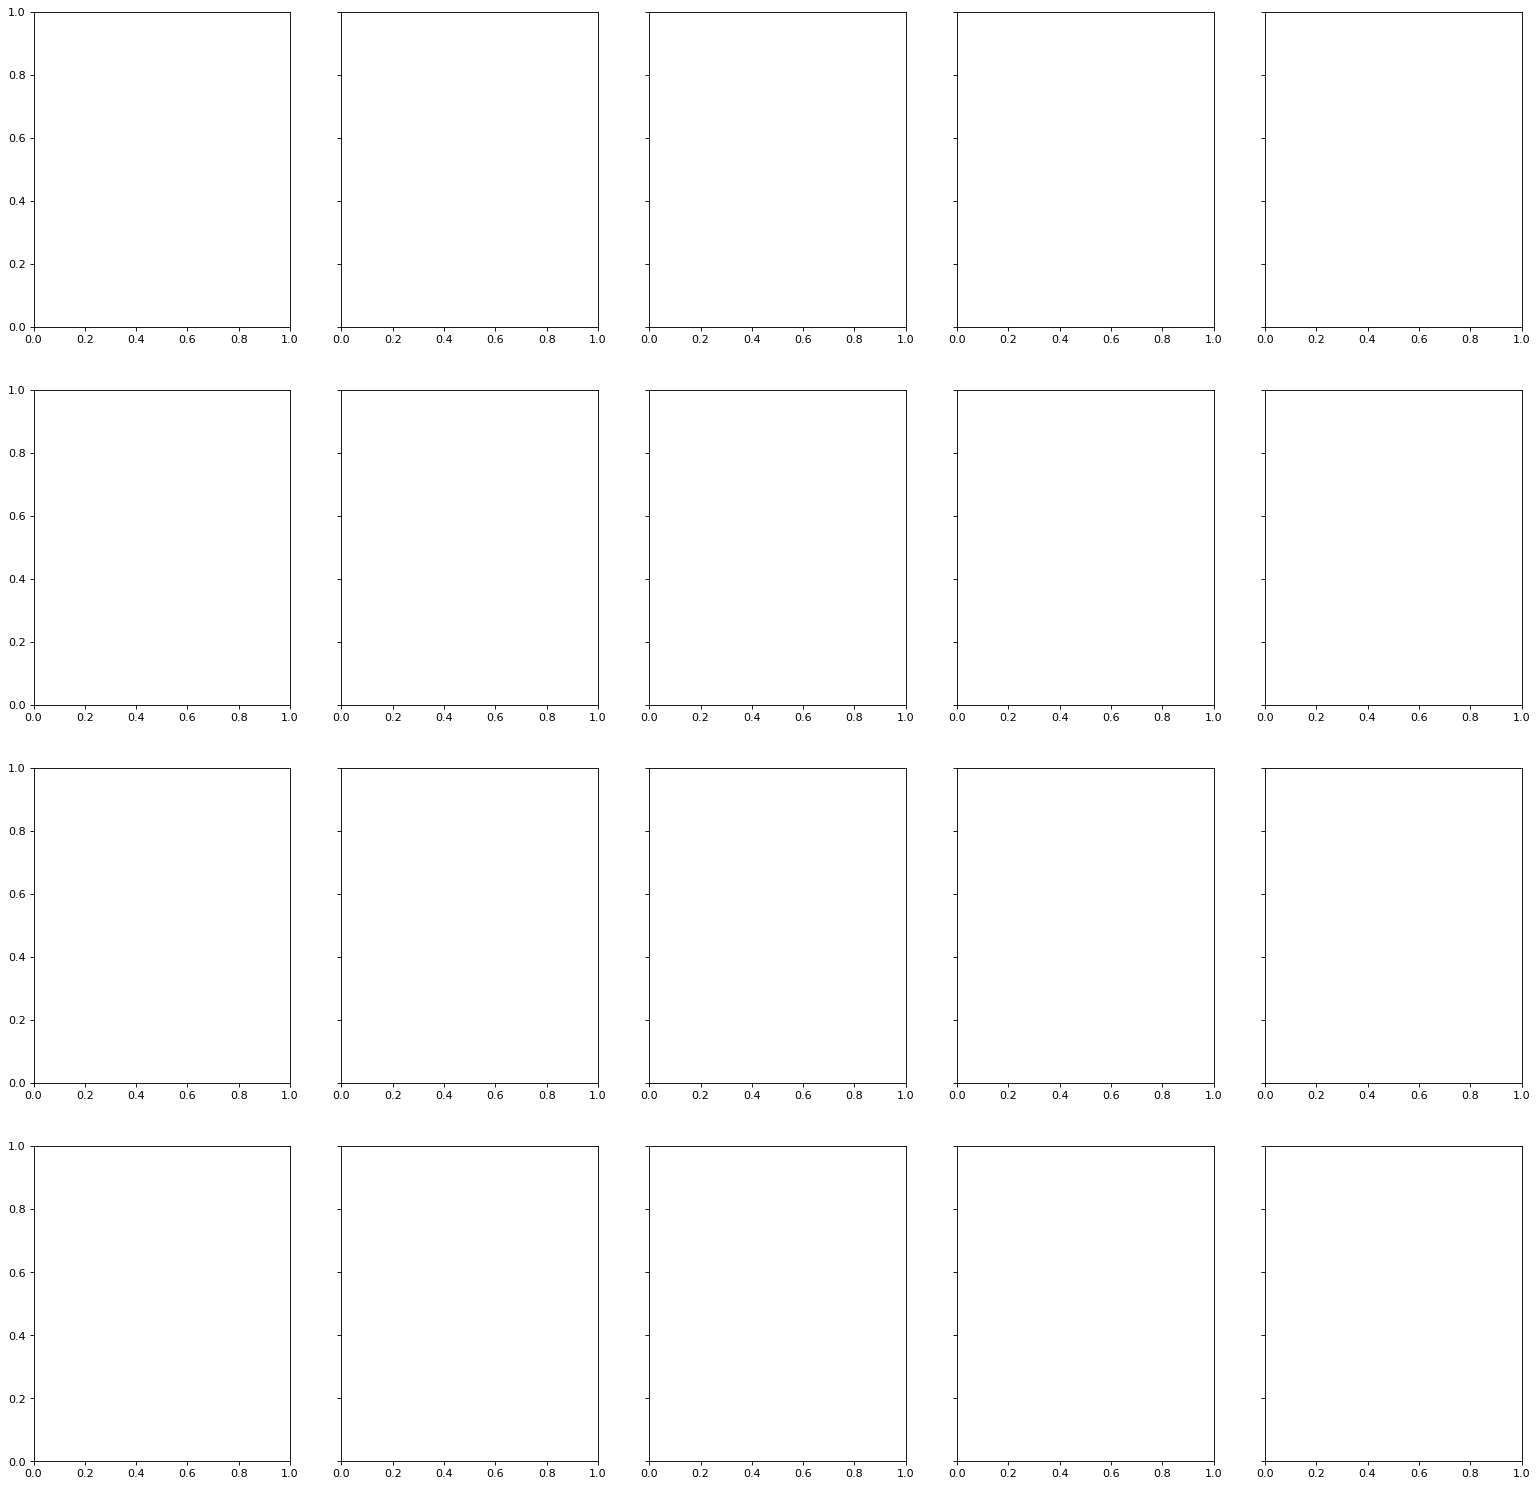

In [4]:
# TODO:


# Bring user deviations as seen in the input 
# Draw barplots to see how each feature affected at user level score for each cluster score
# Do the same at global, team level
# Bring the code in finally

#### FIX THE SIGMA


# In 2 weeks - visualisation for offline data
# Another 2 weeks - Step by step explanation for the sequence of questions generated by the AI

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
import sys

sys.path.append("/Users/ciprian/Work/vortexplore.AI/AI")
from DataDefinitions import *

class ClusterPlotterHelp:
    def __init__(self, clustersSpec : ManualClustersSpec, fileoutput):
        self.clustersSpec = clustersSpec
        self.fileoutput = fileoutput
        
        # Add a figure and a grid with each cluster (rows) x features (columns)
        fig = plt.figure(figsize=(24, 6 * self.clustersSpec.numClusters), dpi=80)
        gs = fig.add_gridspec(self.clustersSpec.numClusters, self.clustersSpec.maxNumFeatures, hspace=0.2, wspace=0.2)
        axs = gs.subplots(sharey='row', sharex='row')
        
        #fig.suptitle(f"cluster {self.clusterName}")
        
        # Put the labels on x and y for all axes
        x_labels = list(range(int(-2*MAX_QUESTION_RESPONSE), int(2*MAX_QUESTION_RESPONSE)))
        y_labels = list(np.linspace(start=0.0, stop =1.0, num = 25))
        for axRow in axs:
            plt.sca(ax)
            plt.xticks(x_labels, color='black')
            plt.yticks(y_labels, color='black')
            
        # Iterate over each cluster plot on the target axes
        for clusterIndex, cluster in enumerate(self.clustersSpec.clusters):
            self.plotCluster(axs[clusterIndex], cluster)
            
        # Save and show the picture
        plt.savefig(self.fileoutput)
    
    def plotCluster(self, axisRowsToDrawOn, singleClusterSpec : ManualSingleClusterSpec):
        self.clusterName = singleClusterSpec.name
        self.numFeatures = singleClusterSpec.numFeatures

        

        randomMeans = np.random.randint(size=[self.numFeatures], low=MIN_QUESTION_RESPONSE, high=MAX_QUESTION_RESPONSE)
        randomDevs = np.random.randint(size=[self.numFeatures], low=MIN_QUESTION_RESPONSE, high=MAX_QUESTION_RESPONSE)

        for clusterIndex in range(self.numFeatures):
            self.plotClusterFeature(axisRowsToDrawOn[clusterIndex], f"featurename{clusterIndex}",
                                    featureMean=randomMeans[clusterIndex],
                                    featureDev=randomDevs[clusterIndex],
                                    isCategory=clusterIndex<self.numFeatures/2)

            intervalLength = (MAX_QUESTION_RESPONSE - MIN_QUESTION_RESPONSE + 1)
            userRandomDevValue = ((np.random.rand() * (2 * intervalLength)) - intervalLength) + (MIN_QUESTION_RESPONSE - 1)
            #print(userRandomDevValue)
            self.plotUserDeviationOnGraph(axisRowsToDrawOn[clusterIndex], devValue=4) #userRandomDevValue)

        #ax1.plot(x, y)
        #ax2.plot(x, y**2, 'tab:orange')
        #ax3.plot(x + 1, -y, 'tab:green')
        #ax4.plot(x + 2, -y**2, 'tab:red')

        for ax in axisRowsToDrawOn.flat:
            ax.set(xlabel='deviation', ylabel='probability')

        #fig.show()
        
        

    def plotClusterFeature(self, axisToDrawOn, featureName, featureMean, featureDev, isCategory):
        font1 = {'family':'serif','color': 'blue' if isCategory is True else 'Green','size':14}
        font2 = {'family':'serif','color':'black','size':10}
        
        curve_color = 'blue'

        axisToDrawOn.set_title(featureName, color= curve_color if isCategory else 'green')
        axisToDrawOn.set(xlabel="Dev", ylabel="Prob")
        #print(x_labels)
        #axisToDrawOn.set_xticks(x_labels)
        #plt.xticks(x_labels)
        #print(plt.xticks())
        #axisToDrawOn.set_xticklabels(x_labels, rotation=90)

        self.featureName = featureName
        self.featureMean = featureMean

        self.sigma = math.sqrt(featureDev)
        x = np.linspace(featureMean - 3*self.sigma, self.featureMean + 3*self.sigma, 100)
        axisToDrawOn.plot(x, stats.norm.pdf(x, self.featureMean, self.sigma))
        self.gaussianDist = stats.norm(self.featureMean, self.sigma)


        xdrawmean = self.featureMean
        ydrawmean = self.gaussianDist.pdf(xdrawmean)
        axisToDrawOn.vlines(x=xdrawmean, ymin=0, ymax=ydrawmean, colors='blue', ls='solid', lw=2)

    def plotUserDeviationOnGraph(self, axisToDrawOn, devValue):
        yProbValue = self.gaussianDist.pdf(devValue)
        user_dev_color = 'red'
        # single vline with specific ymin and ymax
        axisToDrawOn.vlines(x=devValue, ymin=0, ymax=yProbValue, colors=user_dev_color, ls=':', lw=2) # label=f'Score for {self.featureName}={y}')
        #plt.legend()

type1_Spec = ManualSingleClusterSpec(category_features=[ManualClusterFeature(name="Sensitivity", mean=1, dev=1),
                                                         ManualClusterFeature(name="Awareness", mean=1, dev=1)],
                                 attributes_features=[ManualClusterFeature(name="Leadership", mean=1, dev=1),
                                                      ManualClusterFeature(name="Sexual Harassment", mean=1, dev=1)],
                                     name="Cluster0-AnormalHuman")

type2_Spec = ManualSingleClusterSpec(category_features=[ManualClusterFeature(name="Sensitivity", mean=3, dev=1),
                                                        ManualClusterFeature(name="Awareness", mean=1, dev=1)],
                                 attributes_features=[ManualClusterFeature(name="Leadership", mean=3, dev=1),
                                                      ManualClusterFeature(name="Sexual Harassment", mean=2, dev=1)],
                                     name="Cluster1-TheBigLeader")

type3_Spec = ManualSingleClusterSpec(category_features=[ManualClusterFeature(name="Sensitivity", mean=3, dev=1),
                                                        ManualClusterFeature(name="Awareness", mean=1, dev=1),
                                                         ManualClusterFeature(name="Sanction", mean=1, dev=1)],
                                 attributes_features=[ManualClusterFeature(name="Mental Health", mean=3, dev=1),
                                                      ManualClusterFeature(name="Team Interaction", mean=2, dev=1)],
                                                    name = "Cluster2-TheOnesThatNeedPsyho")

type4_Spec = ManualSingleClusterSpec(category_features=[ManualClusterFeature(name="Sensitivity", mean=0, dev=1)],
                                 attributes_features=[ManualClusterFeature(name="Personal Boundaries", mean=0, dev=1),
                                                      ManualClusterFeature(name="Sexual Harassment", mean=0, dev=1)],
                                                    name="Cluster3-Aliens")


manualClustersSpec = ManualClustersSpec([type1_Spec, type2_Spec, type3_Spec, type4_Spec], sharedFeaturesTest=False)


clusterPlortterHelper = ClusterPlotterHelp(clustersSpec=manualClustersSpec, fileoutput="outputname.png")


      